<a href="https://colab.research.google.com/github/atharva42/it-cert-automation-practice/blob/main/Zomato_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [2]:
reviews = pd.read_csv('https://raw.githubusercontent.com/ammishra08/Recommendation-System/master/Zomato/Restaurant%20reviews.csv')
reviews.head(7)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0


In [3]:
reviews.shape

(10000, 7)

In [4]:
reviews.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [5]:
reviews.dropna(inplace = True)

In [6]:
reviews_text = reviews[['Review', 'Rating']]
reviews_text

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4


In [7]:
reviews_text['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [8]:
reviews_text['Rating'] = reviews_text['Rating'].replace('Like', 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
#Typecasting raing in float
reviews_text['Rating'] = reviews_text['Rating'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
reviews_text

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4.0


In [11]:
reviews_text['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [12]:
reviews_text['Rating'] = np.where(reviews_text['Rating'] < 4, 0,1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


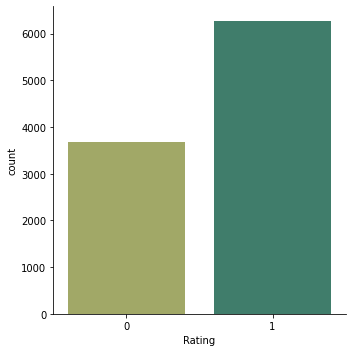

In [13]:
sns.catplot('Rating', kind='count', data=reviews_text, palette = 'gist_earth_r')

**NLP text pre-processor**

In [14]:
cleanup_re = re.compile('[^a-z]+')

def clean(sentence):
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ', sentence).strip()
  return sentence

In [15]:
#apply method is used for applying user declared function to data frames
reviews_text['Review'] = reviews_text['Review'].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
reviews_text['Review']

0       the ambience was good food was quite good had ...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is good we ordered kodi drumsticks and ba...
                              ...                        
9995    madhumathi mahajan well to start with nice cou...
9996    this place has never disappointed us the food ...
9997    bad rating is mainly because of chicken bone f...
9998    i personally love and prefer chinese food had ...
9999    checked in here to try some delicious chinese ...
Name: Review, Length: 9955, dtype: object

In [17]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [18]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [19]:
def preprocess(sentence):
  sentence = str(sentence)
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  sentence  = ' '.join(i for i in word_tokens if not i in stop_words)
  return sentence

In [20]:
reviews_text['Review'] = reviews_text['Review'].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
reviews_text

,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen das arun great guy behavior sincerety g...,1
4,food good ordered kodi drumsticks basket mutto...,1
...,...,...
9995,madhumathi mahajan well start nice courteous s...,0
9996,place never disappointed us food courteous sta...,1
9997,bad rating mainly chicken bone found veg food ...,0
9998,personally love prefer chinese food couple tim...,1


In [22]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def preprocess_lem (sentence):
    input_str = word_tokenize(sentence)
    lemmatized_op = ' '.join([lemma.lemmatize(w) for w in input_str])
    return lemmatized_op

reviews_text['Review'] = reviews_text['Review'].apply(preprocess_lem)
reviews_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Review,Rating
0,ambience good food quite good saturday lunch c...,1
1,ambience good pleasant evening service prompt ...,1
2,must try great food great ambience thnx servic...,1
3,soumen da arun great guy behavior sincerety go...,1
4,food good ordered kodi drumstick basket mutton...,1
...,...,...
9995,madhumathi mahajan well start nice courteous s...,0
9996,place never disappointed u food courteous staf...,1
9997,bad rating mainly chicken bone found veg food ...,0
9998,personally love prefer chinese food couple tim...,1


In [23]:
x = reviews_text['Review']
y = reviews_text['Rating']

**LSTM**

In [24]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import LSTM, Dropout, Bidirectional
from keras.callbacks import EarlyStopping

In [25]:
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words = MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [26]:
tokenizer.fit_on_texts(x)

In [27]:
tokenizer.word_index

{'good': 1,
 'food': 2,
 'place': 3,
 'service': 4,
 'chicken': 5,
 'taste': 6,
 'ordered': 7,
 'ambience': 8,
 'time': 9,
 'one': 10,
 'great': 11,
 'really': 12,
 'also': 13,
 'nice': 14,
 'like': 15,
 'restaurant': 16,
 'best': 17,
 'biryani': 18,
 'staff': 19,
 'order': 20,
 'visit': 21,
 'try': 22,
 'veg': 23,
 'experience': 24,
 'u': 25,
 'well': 26,
 'starter': 27,
 'would': 28,
 'dish': 29,
 'amazing': 30,
 'must': 31,
 'friend': 32,
 'awesome': 33,
 'even': 34,
 'quality': 35,
 'go': 36,
 'served': 37,
 'rice': 38,
 'overall': 39,
 'price': 40,
 'went': 41,
 'item': 42,
 'get': 43,
 'drink': 44,
 'paneer': 45,
 'menu': 46,
 'tasty': 47,
 'quantity': 48,
 'bad': 49,
 'buffet': 50,
 'love': 51,
 'much': 52,
 'tried': 53,
 'delicious': 54,
 'ambiance': 55,
 'loved': 56,
 'main': 57,
 'better': 58,
 'spicy': 59,
 'lunch': 60,
 'got': 61,
 'course': 62,
 'friendly': 63,
 'pizza': 64,
 'hyderabad': 65,
 'people': 66,
 'worst': 67,
 'music': 68,
 'tasted': 69,
 'fish': 70,
 'lot': 71

In [28]:
from keras.preprocessing.sequence import pad_sequences

In [29]:
tokenizer.word_index

{'good': 1,
 'food': 2,
 'place': 3,
 'service': 4,
 'chicken': 5,
 'taste': 6,
 'ordered': 7,
 'ambience': 8,
 'time': 9,
 'one': 10,
 'great': 11,
 'really': 12,
 'also': 13,
 'nice': 14,
 'like': 15,
 'restaurant': 16,
 'best': 17,
 'biryani': 18,
 'staff': 19,
 'order': 20,
 'visit': 21,
 'try': 22,
 'veg': 23,
 'experience': 24,
 'u': 25,
 'well': 26,
 'starter': 27,
 'would': 28,
 'dish': 29,
 'amazing': 30,
 'must': 31,
 'friend': 32,
 'awesome': 33,
 'even': 34,
 'quality': 35,
 'go': 36,
 'served': 37,
 'rice': 38,
 'overall': 39,
 'price': 40,
 'went': 41,
 'item': 42,
 'get': 43,
 'drink': 44,
 'paneer': 45,
 'menu': 46,
 'tasty': 47,
 'quantity': 48,
 'bad': 49,
 'buffet': 50,
 'love': 51,
 'much': 52,
 'tried': 53,
 'delicious': 54,
 'ambiance': 55,
 'loved': 56,
 'main': 57,
 'better': 58,
 'spicy': 59,
 'lunch': 60,
 'got': 61,
 'course': 62,
 'friendly': 63,
 'pizza': 64,
 'hyderabad': 65,
 'people': 66,
 'worst': 67,
 'music': 68,
 'tasted': 69,
 'fish': 70,
 'lot': 71

In [30]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=50)
print('shape of data tensor is:', x.shape)

shape of data tensor is: (9955, 50)


In [31]:
x

array([[   0,    0,    0, ...,   12,  197,  419],
       [   0,    0,    0, ..., 1550, 1036,    4],
       [   0,    0,    0, ...,   68, 1507,   30],
       ...,
       [ 359,  122,  571, ..., 1456,  792,  271],
       [   0,    0,    0, ...,  892,    4,  227],
       [3394,   53, 1397, ...,   79,  263,    8]], dtype=int32)

**Split inot Train and test- Cross Validation method**

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [33]:
EMBEDDING_LEN = 100
MAX_LEN = 50

**Binary rating classification**

In [34]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim = EMBEDDING_LEN, input_length = MAX_LEN))
model.add(LSTM(units = 300, recurrent_dropout=0.1))
model.add(Dropout(0.2))
#Last layer = 1(binary classification)
model.add(Dense(1, activation='sigmoid'))
#loss  = 'binary_crossentropy
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 300)               481200    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 1,481,501
Trainable params: 1,481,501
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
from keras import callbacks

filepath = '/content/best_model.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath, moniter = 'val_loss', save_best_only = True, mode = 'min', verbose = 1)

callbacks_list = [checkpoint]

In [36]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs = 11, batch_size=64, callbacks = callbacks_list, verbose = 1)

Epoch 1/11
125/125 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.7857
Epoch 1: val_loss improved from inf to 0.33875, saving model to /content/best_model.hdf5
125/125 [==============================] - 29s 187ms/step - loss: 0.4614 - accuracy: 0.7857 - val_loss: 0.3388 - val_accuracy: 0.8553
Epoch 2/11
125/125 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.8909
Epoch 2: val_loss did not improve from 0.33875
125/125 [==============================] - 24s 196ms/step - loss: 0.2665 - accuracy: 0.8909 - val_loss: 0.3406 - val_accuracy: 0.8553
Epoch 3/11
125/125 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.9282
Epoch 3: val_loss did not improve from 0.33875
125/125 [==============================] - 23s 183ms/step - loss: 0.1938 - accuracy: 0.9282 - val_loss: 0.3819 - val_accuracy: 0.8533
Epoch 4/11
125/125 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9446
Epoch 4: val_loss did not impro

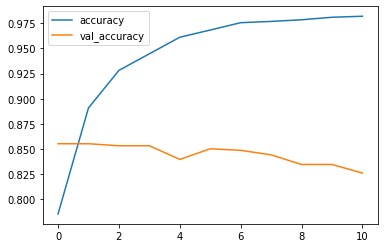

In [37]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

In [38]:
model.load_weights('/content/best_model.hdf5')

In [39]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 18ms/step - loss: 0.3388 - accuracy: 0.8553


[0.33875200152397156, 0.855349063873291]

In [40]:
prediction = model.predict(x_test)

In [41]:
np.round(prediction)

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

**Classification Report**

1.   Confusion Matrix



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.round(prediction))

array([[ 526,  198],
       [  90, 1177]])

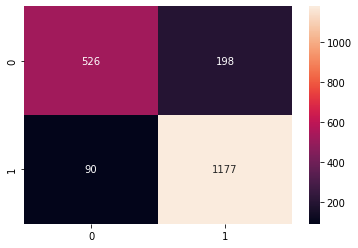

In [43]:
sns.heatmap(confusion_matrix(y_test, np.round(prediction)), annot = True, fmt = '0.0f')